In [1]:
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np
from modal_analysis.rb_simple import SimpleRB

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [2]:
time_steps=[1e-3, 1e-2, 1e-1, 10**-.5, 1e-0]
angle_vecs=[]
time_arrays=[]
omega_vecs=[]
for i in range(len(time_steps)):
    time_step=time_steps[i]
    print(time_step)
    num_modes=10
    ma=SimpleRB('test', 3, 
                 mesh_file='../mesh_files/double_beam.msh',
                 material_file='../material_files/steel.dat',
                num_modes=num_modes,
                force_path='../forces/pure_rotation_dub_500.txt',
                eigenmode_path='../Double_RB_modes.csv',
               timestep=time_step,
               T=10)
    ma.solve()
    ma.get_rotation_angles()
    time_arrays.append(ma.time_array)
    angle_vecs.append(ma.angle_vect[0])
    omega_vecs.append(ma.rb_omega[0])

0.001
0.01
0.1
0.31622776601683794
1.0


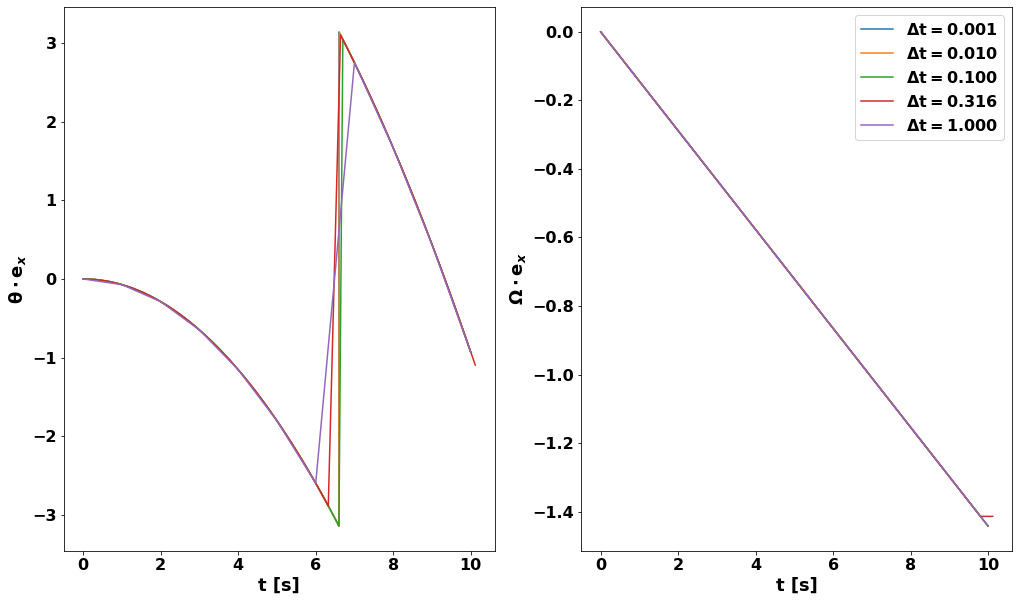

In [3]:
fig,ax=plt.subplots(1,2, figsize=(17,10))
for i in range(len(time_steps)):
    ax[0].plot(time_arrays[i], angle_vecs[i], label=r"$\mathbf{\Delta} \mathbf{t}=$"+'{0:.3f}'.format((time_steps[i])))
    ax[1].plot(time_arrays[i], omega_vecs[i], label=r"$\mathbf{\Delta} \mathbf{t}=$"+'{0:.3f}'.format((time_steps[i])))
ax[0].set_xlabel("t [s]")
ax[1].set_xlabel("t [s]")
ax[0].set_ylabel(r"$\mathbf{\theta} \cdot \mathbf{e}_x$")
ax[1].set_ylabel(r"$\mathbf{\Omega} \cdot \mathbf{e}_x$")
plt.legend()
plt.savefig('timestep.png', bbox_inches='tight')
plt.show()